## To do:

Convert release dates to months
Remove overly-correlated variables like opening weekend rev. See if opening weekend theaters is too highly correlated.
Hunt down the na values.
Maybe add difference between worldwide and domestic release dates?


In [70]:
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Ridge
from scipy import stats
import statsmodels

In [71]:

df = pd.read_table("horror.txt", delimiter = '\t',parse_dates=True,infer_datetime_format=True,date_parser=pd.to_datetime)
df['ROI'] = df['Worldwide Box Office']/df['Production Budget']#
#print df['ROI']
minroi = np.min(df[df['ROI']>0]['ROI'])
print minroi
df['log ROI'] = df['ROI'].apply(lambda x: np.log(x) if x>0 else None)
df['adj log ROI']= df['ROI'].apply(lambda x: np.log(x) if x>0 else np.log(x+minroi/2)) #if x>0 else -100)
df['cube root ROI'] = df['ROI'].apply(lambda x : x**(1.0/3))
#print df['cube root ROI']
#print df['ROI']
#print df.iloc[0:15]
#print df.columns
df

0.000192307692308


,Number,Released,Released Worldwide,Year,Year.1,Title,Theatrical Distributor,Genre,Source,Production Method,...,International Box Office,Worldwide Box Office,Jumps,Rating,Runtime,IMDb Score,ROI,log ROI,adj log ROI,cube root ROI
0,1,Feb 24 2017,Feb 24 2017,2017,2017,Get Out,Universal,Horror,Original Screenplay,Live Action,...,0,46227375,0,r,103,8.3,9.245475,2.224134,2.224134,2.098826
1,2,Feb 3 2017,Feb 3 2017,2017,2017,Rings,Paramount Pictures,Horror,Original Screenplay,Live Action,...,47400000,74843754,0,pg13,102,4.5,2.993750,1.096527,1.096527,1.441247
2,3,Jan 20 2017,Jan 18 2017,2017,2017,Split,Universal,Horror,Original Screenplay,Live Action,...,90367218,222086658,0,pg13,117,7.5,44.417332,3.793630,3.793630,3.541475
3,4,Oct 21 2016,Oct 20 2016,2016,2016,Ouija: Origin of Evil,Universal,Horror,Based on Game,Live Action,...,46687361,81831866,18,pg13,99,6.2,9.092430,2.207442,2.207442,2.087180
4,5,Sep 16 2016,Sep 15 2016,2016,2016,Blair Witch,Lionsgate,Horror,Original Screenplay,Live Action,...,16716160,37493221,18,r,89,5.1,3.749322,1.321575,1.321575,1.553523
5,6,Sep 2 2016,Sep 2 2016,2016,2016,Antibirth,IFC Midnight,Horror,Original Screenplay,Live Action,...,0,0,0,nr,94,4.9,0.000000,NaN,-9.249561,0.000000
6,7,Aug 26 2016,Aug 25 2016,2016,2016,Don�t Breathe,Sony Pictures,Horror,Original Screenplay,Live Action,...,68967198,158185073,17,r,88,7.2,15.818507,2.761181,2.761181,2.510278
7,8,Jul 22 2016,Jul 21 2016,2016,2016,Lights Out,Warner Bros.,Horror,Based on Short Film,Live Action,...,81600000,148868835,19,pg13,81,6.4,29.773767,3.393628,3.393628,3.099402
8,9,Jul 1 2016,Jul 1 2016,2016,2016,The Purge: Election Year,Universal,Horror,Original Screenplay,Live Action,...,39514684,118557124,9,r,109,6.0,11.855712,2.472810,2.472810,2.280215
9,10,Jun 24 2016,Jun 9 2016,2016,2016,The Neon Demon,Broad Green Pictures,Horror,Original Screenplay,Live Action,...,1120158,2453282,2,r,118,6.3,0.327104,-1.117476,-1.117476,0.689015


In [72]:
ptest = df[['Title', 'Released','Released Worldwide', 'Year', 'Theatrical Distributor','Source','Creative Type', \
            'Production Budget', 'Opening Weekend Theaters', 'Opening Weekend Revenue',\
            'Jumps', 'Rating', 'Runtime', 'IMDb Score']]
#print(df[['Title', 'Jumps']])
# for i in df:
#     if i=='0*':
#         i=-1
# maxjump = df['Jumps'].idxmax(skipna=True)
# print df[0:1]

In [73]:
#print ptest.columns
#print ptest['Worldwide Box Office'][:5]
#print ptest['Released'][:5]
ptest['Released'] = pd.to_datetime(ptest['Released'], infer_datetime_format=True)
ptest['Released Worldwide'] = pd.to_datetime(ptest['Released Worldwide'], infer_datetime_format=True)
#print ptest['Released']
#plt.plot(ptest['Worldwide Box Office'])
#plt.show()
ptest['Month'] = ptest['Released'].apply(lambda x: x.month)
ptest['Release Lag'] = ptest['Released Worldwide']-ptest['Released']
ptest['Release Lag'] = ptest['Release Lag'].apply(lambda x: x.total_seconds()/3600.0/24.0)
ptest

C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

,Title,Released,Released Worldwide,Year,Theatrical Distributor,Source,Creative Type,Production Budget,Opening Weekend Theaters,Opening Weekend Revenue,Jumps,Rating,Runtime,IMDb Score,Month,Release Lag
0,Get Out,2017-02-24,2017-02-24,2017,Universal,Original Screenplay,Contemporary Fiction,5000000,2781,33377060,0,r,103,8.3,2,0.0
1,Rings,2017-02-03,2017-02-03,2017,Paramount Pictures,Original Screenplay,Contemporary Fiction,25000000,2931,13002632,0,pg13,102,4.5,2,0.0
2,Split,2017-01-20,2017-01-18,2017,Universal,Original Screenplay,Contemporary Fiction,5000000,3038,40010975,0,pg13,117,7.5,1,-2.0
3,Ouija: Origin of Evil,2016-10-21,2016-10-20,2016,Universal,Based on Game,Fantasy,9000000,3167,14065500,18,pg13,99,6.2,10,-1.0
4,Blair Witch,2016-09-16,2016-09-15,2016,Lionsgate,Original Screenplay,Contemporary Fiction,10000000,3121,9576057,18,r,89,5.1,9,-1.0
5,Antibirth,2016-09-02,2016-09-02,2016,IFC Midnight,Original Screenplay,Science Fiction,2500000,0,0,0,nr,94,4.9,9,0.0
6,Don�t Breathe,2016-08-26,2016-08-25,2016,Sony Pictures,Original Screenplay,Contemporary Fiction,10000000,3051,26411706,17,r,88,7.2,8,-1.0
7,Lights Out,2016-07-22,2016-07-21,2016,Warner Bros.,Based on Short Film,Fantasy,5000000,2818,21688103,19,pg13,81,6.4,7,-1.0
8,The Purge: Election Year,2016-07-01,2016-07-01,2016,Universal,Original Screenplay,Science Fiction,10000000,2796,31515110,9,r,109,6.0,7,0.0
9,The Neon Demon,2016-06-24,2016-06-09,2016,Broad Green Pictures,Original Screenplay,Contemporary Fiction,7500000,783,589014,2,r,118,6.3,6,-15.0


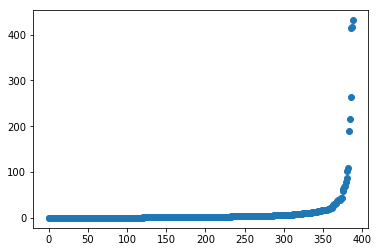

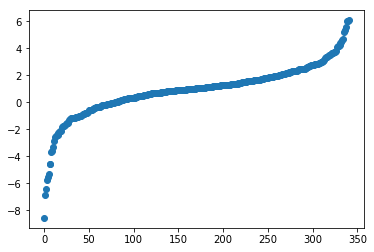

In [74]:
# print df['Theatrical Distributor'].value_counts()
# print df['Theatrical Distributor'].unique().shape
# print df['Theatrical Distributor'].unique()
# loctest = ptest.copy()
# loctest.loc(['Release'])=3
#ptest.loc(['Theatrical Distributor'])=3
#ptest.loc(['Sony Pictures', 'Theatrical Distributor'])
y = df['ROI'].copy()
#y = y.sort_values(inplace=True())
y = np.array(y)
idx = np.argsort(y)
enum = np.arange(y.shape[0])
plt.scatter(enum, y[idx])
plt.show()
y = df['log ROI'].copy()
#y = y.sort_values(inplace=True())
y = np.array(y)
idx = np.argsort(y)

plt.scatter(enum, y[idx])
plt.show()

In [75]:
# ptest = df[['Released','Released Worldwide', 'Year', 'Theatrical Distributor','Source','Creative Type', \
#             'Production Budget', 'Opening Weekend Theaters', 'Opening Weekend Revenue', 'Worldwide Box Office',\
#             'Jumps', 'Rating', 'Runtime', 'IMDb Score']]
# counts = ptest['Theatrical Distributor'].value_counts()
# print counts.loc(['Theatrical Distributor', 'Sony Pictures'])
# print counts.unique()
# for i in ptest['Theatrical Distributor']:
#     ptest.loc(['Theatrical Distributor', i]) = counts[i]

# print ptest['Theatrical Distributor']
#print(df[['Title', 'Jumps']])
#print ptest.groupby('Theatrical Distributor')
#counts = ptest.apply(lambda x: x.map(x.value_counts()))


#ptest.loc()
#counts
#print df[15:16]
#print df['Theatrical Distributor']
counts = df['Theatrical Distributor'].value_counts()
others = counts[counts<=5].index
# test = df.copy()
# test['Theatrical Distributor'].fillna("No distributor")
# print test['Theatrical Distributor']
#test.replace(test[test['Theatrical Distributor']==np.nan], 'No distributor', inplace=True)
#whatareyou = test.iloc[15]['Theatrical Distributor']#[15:16].value
#print whatareyou
#print test[test['Theatrical Distributor']==whatareyou]
#print test[15:20]
#print test[test['Theatrical Distributor']==np.nan]

#print test['Theatrical Distributor']
print ptest['Theatrical Distributor']
print ptest['Theatrical Distributor'].replace(others, 'Other', inplace=True)
print ptest['Theatrical Distributor'].unique()
#ptest.loc([:,'Theatrical Distributor']) = 3#counts.loc(['Theatrical Distributor'])
#WE SHOULDNT ACTUALLY DO THIS
#INSTEAD REPLACE ALL COUNTS WITH OTHER
# ptest['Theatrical Distributor']=counts['Theatrical Distributor']

#counts = ptest.apply(lambda x: x.value_counts())
#print ptest['Theatrical Distributor']#['Theatrical Distributor']
#print counts

0                           Universal
1                  Paramount Pictures
2                           Universal
3                           Universal
4                           Lionsgate
5                        IFC Midnight
6                       Sony Pictures
7                        Warner Bros.
8                           Universal
9                Broad Green Pictures
10                       Warner Bros.
11                 High Top Releasing
12                                A24
13                                A24
14                  STX Entertainment
15                                NaN
16                                NaN
17                                NaN
18                                NaN
19                       IFC Midnight
20                                NaN
21                                NaN
22                 Paramount Pictures
23                          Universal
24                      Sony Pictures
25                                NaN
26          

In [76]:
print ptest.columns
ptest.iloc[2]

Index([u'Title', u'Released', u'Released Worldwide', u'Year',
       u'Theatrical Distributor', u'Source', u'Creative Type',
       u'Production Budget', u'Opening Weekend Theaters',
       u'Opening Weekend Revenue', u'Jumps', u'Rating', u'Runtime',
       u'IMDb Score', u'Month', u'Release Lag'],
      dtype='object')


Title                                      Split
Released                     2017-01-20 00:00:00
Released Worldwide           2017-01-18 00:00:00
Year                                        2017
Theatrical Distributor                 Universal
Source                       Original Screenplay
Creative Type               Contemporary Fiction
Production Budget                        5000000
Opening Weekend Theaters                    3038
Opening Weekend Revenue                 40010975
Jumps                                          0
Rating                                      pg13
Runtime                                      117
IMDb Score                                   7.5
Month                                          1
Release Lag                                   -2
Name: 2, dtype: object

In [77]:
#print ptest['Production Budget'][:5]
#print titles[:5]
#print ptest[ptest['Worldwide Box Office']<=1]['Worldwide Box Office'].value_counts()
dummies = pd.get_dummies(ptest.iloc[:, 1:])
print dummies.columns.shape
#print dummies.iloc[15]
#dummies[dummies['Runtime']<=60]
#dummies = dummies['Runtime'].fillna(90)

(49L,)


In [78]:
blanks = dummies.copy()
blanks = blanks.fillna(-20)

for col in blanks.iloc[:, 3:]:
    temp= ptest[blanks[col]==-20]['Title']
    if len(temp)>0:
        print temp

In [79]:
def get_p(X, y, yhat,coefs):
    sse = np.sum((yhat-y)**2,axis=0)/float(X.shape[0]-X.shape[1])
    se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
    t = coefs/se
    return 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X.shape[1]))

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,  10,  11,
            ...
            379, 380, 381, 382, 383, 384, 385, 386, 387, 388],
           dtype='int64', length=261)
0.724238832539
Lasso results:


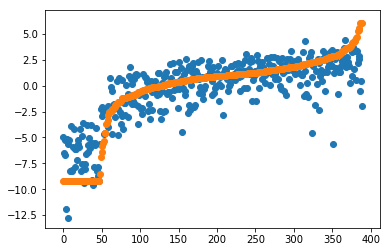

26


C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


,Variables,Coefficients,P values
2,Opening Weekend Theaters,1.650759e-03,1.110223e-15
3,Opening Weekend Revenue,1.432874e-08,4.258246e-01
4,Jumps,2.048846e-02,2.896377e-01
6,IMDb Score,8.057186e-01,2.623324e-11
8,Release Lag,3.556444e-03,1.597031e-01
9,Theatrical Distributor_20th Century Fox,7.937203e-01,3.105187e-01
10,Theatrical Distributor_Lionsgate,1.130009e+00,7.772423e-02
11,Theatrical Distributor_MGM,3.223921e-01,6.961244e-01
12,Theatrical Distributor_Magnolia Pictures,2.859466e+00,2.621837e-03
14,Theatrical Distributor_Miramax/Dimension,2.495068e-01,8.037790e-01


In [80]:
from sklearn.linear_model import LinearRegression

dummies3 = dummies.iloc[:, 3:].apply(lambda x: x**3)
#print dummies.iloc[0:3,3:]
X = dummies.iloc[:,2:] #dummies3#.iloc[:, 3:]
#y = df['log ROI']
posidx = df[df['log ROI']>0].index
print posidx
y = df['adj log ROI']
#print X

lassoreg = LassoLars(alpha=0.0025,normalize=True, max_iter=10000)
lassoreg.fit(X,y)

print lassoreg.score(X,y)
print("Lasso results:")
zip(dummies.columns[2:],lassoreg.coef_)

lassohat = lassoreg.predict(X)
resid = lassohat-y
npy = np.array(y)
nphat = np.array(lassohat)
idx = np.argsort(y)
plt.scatter(np.arange(len(y)), lassohat[idx])
plt.scatter(np.arange(len(y)), y[idx])
plt.show()
results = pd.DataFrame()
results['Variables']=dummies.columns[2:]
results['Coefficients'] = lassoreg.coef_
results['P values'] = get_p(X,y,lassohat,lassoreg.coef_).T
posresults = results[results['Coefficients']>0]
print len(posresults)
posresults
#ps=get_p(X,y,lassohat,lassoreg.coef_)
#zip(dummies.columns[3:],lassoreg.coef_,ps.T)

In [81]:
ridgereg = Ridge(alpha=0.0025,normalize=True)
ridgereg.fit(X,y)
ridgehat = ridgereg.predict(X)
print ridgereg.score(X,y)
print("Ridge results:")
results = pd.DataFrame()
results['Variables']=dummies.columns[3:]
results['Coefficients'] = ridgereg.coef_
results['P values'] = get_p(X,y,ridgehat,ridgereg.coef_).T


plt.scatter(np.arange(len(y)),ridgehat[idx])
plt.scatter(np.arange(len(y)),y[idx])
plt.show()

results[results['Coefficients']>0]

0.755309564754
Ridge results:


ValueError: Length of values does not match length of index

In [ ]:
from sklearn.svm import SVR
Xtr = X[:300]
Ytr = y[:300]
Xtest = X[300:]
ytest = y[300:]
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf.fit(X,y)
print svr_rbf.score(X,y)
yhats = svr_rbf.predict(Xtest)

ydiff=yhats-ytest
print np.dot(ydiff,ydiff)/len(ydiff)

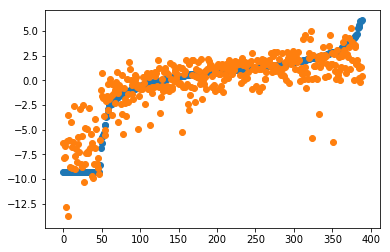

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            adj log ROI   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     19.93
Date:                Wed, 15 Mar 2017   Prob (F-statistic):           3.43e-71
Time:                        21:48:42   Log-Likelihood:                -819.96
No. Observations:                 389   AIC:                             1732.
Df Residuals:                     343   BIC:                             1914.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
const                                         -6.0566     25.498     -0.238      0.812       -56.209    44.096
Year                                          -0.0024      0.014     -0.163      0.871        -0.031     0.026
Production Budget                          -4.075e-08    8.3e-09     -4.907      0.000     -5.71e-08 -2.44e-08
Opening Weekend Theaters                       0.0010      0.000      5.338      0.000         0.001     0.001
Opening Weekend Revenue                     2.054e-08   1.78e-08      1.151      0.251     -1.46e-08  5.56e-08
Jumps                                         -0.0009      0.019     -0.044      0.965        -0.039     0.037
Runtime                                       -0.0007      0.010     -0.072      0.943        -0.020     0.018
IMDb Score                                     0.9693      0.117      8.294      0.000         0.739     1.199
Month                                         -0.0319      0.033     -0.953      0.341        -0.098     0.034
Release Lag                                    0.0067      0.002      2.704      0.007         0.002     0.012
Theatrical Distributor_20th Century Fox        4.4121      0.782      5.646      0.000         2.875     5.949
Theatrical Distributor_Lionsgate               3.8397      0.639      6.011      0.000         2.583     5.096
Theatrical Distributor_MGM                     3.8638      0.825      4.684      0.000         2.241     5.486
Theatrical Distributor_Magnolia Pictures       4.1975      0.943      4.453      0.000         2.343     6.052
Theatrical Distributor_Miramax                 4.0921      0.963      4.248      0.000         2.197     5.987
Theatrical Distributor_Miramax/Dimension       3.5610      1.003      3.550      0.000         1.588     5.534
Theatrical Distributor_New Line                4.8448      0.731      6.624      0.000         3.406     6.283
Theatrical Distributor_Other                   4.1640      0.464      8.967      0.000         3.251     5.077
Theatrical Distributor_Paramount Pictures      4.9309      0.660      7.475      0.000         3.633     6.228
Theatrical Distributor_Sony Pictures           3.8665      0.648      5.963      0.000         2.591     5.142
Theatrical Distributor_Universal               3.9916      0.631      6.329      0.000         2.751     5.232
Theatrical Distributor_Warner Bros.            4.8491      0.653      7.421      0.000         3.564     6.134
Theatrical Distributor_Weinstein/Dimension     3.5965      1.016      3.541      0.000         1.599     5.595
Source_Based on Comic/Graphic Novel           -0.7342      1.378     -0.533      0.595        -3.445     1.976
Source_Based on Factual Book/Article                0          0        nan        nan

In [92]:
#y_pred = lassoreg.predict(data[predictors])
# rss = np.sum((y_pred - df['ROI'])**2)
import statsmodels.api as sm
X2 = sm.add_constant(X)
# lm = LinearRegression()
# lm.fit(X2,y)
# coefs =  lm.coef_
# print lm.score(X2,y)
# print("OLS results: ")
# print zip(dummies.columns[3:], coefs)

model = sm.OLS(y,X2)#stats0models.regression.linear_models.ols(y,X)#sm.ols(y,X)
result = model.fit_regularized(alpha=0.002, l1_wt=1)
yhat = result.predict(X2)
yhat = np.array(yhat)
ys = np.array(y)
sort = np.argsort(ys)
plt.scatter(np.arange(len(ys)),ys[sort])
plt.scatter(np.arange(len(ys)),yhat[sort])
plt.show()
summary = result.summary()
#np.savetxt("lassosummary.txt", summary)
text_file = open("LassoOutput.txt", "w")
text_file.write(str(summary))
text_file.close()
summary
# smhat = result.predict(X)
# print smhat.shape

0.402086087121
2.47425188159


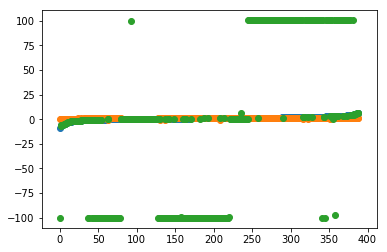

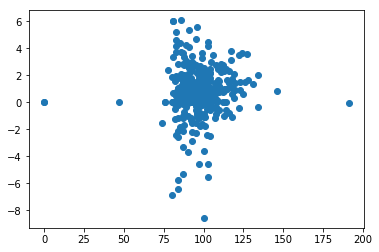

In [41]:
print lm.score(X,y)
yhat = lassoreg.predict(X)
rbf = svr_rbf.predict(X)
both = zip(yhat,y)

#print enum


mse=0.0
cnt=0.0
y2 = []
yhat2 = []
yhat3 = []
for i in range(y.shape[0]):
    if y[i]<100:
        mse+=(y[i]-yhat[i])**2
        cnt+=1.0
        y2.append(y[i])
        yhat2.append(yhat[i])
        yhat3.append(rbf[i])
print mse/cnt
enum = np.arange(len(yhat2))

y2=np.array(y2)
yhat2 = np.array(yhat2)
yhat3 = np.array(yhat3)
idx = np.argsort(y2)
#print idx
y2 = y2[idx]
#print y2
yhat2 = yhat2[idx]
yhat3 = yhat3[idx]
plt.scatter(enum, y2)
plt.scatter(enum, yhat2)
plt.scatter(enum, yhat3)
plt.show()

#plt.scatter(df['Runtime'], y)
#plt.show()

In [84]:

#CODE IN A COLUMN FOR DIFFERENCE IN RELEASE DATES
#MONTH OF YEAR
#DISTRIBUTOR TOTALS
#ROI
#JUMP SCARES
#PG13/R RATINGS
#RUN TIMES

#dist_counts = ptest.groupby('Theatrical Distributor')

def get_dict(col):
    #pdb.set_trace()
    xdict = {}
    val=0
    for x in col:
        if not x in xdict:
            #print('Nope')
            xdict[x] = val
            val+=1
    return xdict
def replace_from_dict(x,xdict):
    if x in xdict:
        x = xdict[x]
    return x

#returns the average "normalized" squared leave-one-out cross-validation error
def cross_val(X,y, model):
    error = 0.0
    size = len(y)
    cnt=0.0
    #alltrained = model.fit(X,y)
    #allyhat = model.predict(X)
    #ybar = np.mean(y)
    #yhatbar = np.mean(allyhat)
    for i in range(size):
        mask = np.ones(size, dtype=bool)
        mask[i] = 0
        trained = model.fit(X[mask], y[mask])
        guess = trained.predict(X.iloc[i].values.reshape(1,-1))
        ierr = (guess-y[i])**2
        error+=ierr/guess/guess#/ybar/yhatbar
        cnt+=1.0
    return error/cnt
def cross_val2(X,y,a):
    error = 0.0
    size = len(y)
    cnt=0.0
    print("There are %d samples" %(size))
    #alltrained = model.fit(X,y)
    #allyhat = model.predict(X)
    #ybar = np.mean(y)
    #yhatbar = np.mean(allyhat)
    for i in range(size):
        mask = np.ones(size, dtype=bool)
        mask[i] = 0
        model = sm.OLS(y[mask],X[mask])
        trained = model.fit_regularized(alpha=a, l1_wt=1)
        guess = trained.predict(X.iloc[i].values.reshape(1,-1))
        ierr = (guess-y[i])**2
        error+=ierr#/guess/guess#/ybar/yhatbar
        cnt+=1.0
        if i%20==0:
            print i
    return error/cnt
# def cross_val3(X,y,model,a):
    
alphas=np.arange(1, 20) * 0.0005#[0.00001, 0.0001,0.001, 0.01, 0.1, 1]
print alphas




mses=[]
for a in alphas:
    err=cross_val2(X,y,a)
    mses.append(err)
    print err
print mses
# alphas = np.arange(1,20) * 0.0005
# print alphas #[0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006]
# mses = []
# for a in alphas:
#     lasso = LassoLars(alpha=a,normalize=True, max_iter=10000)
#     lasso.fit(X,y)
#     err = cross_val(X,y,lasso)
#     mses.append(err)
# print zip(alphas,np.array(mses))
    #print lassoreg.predict(X.iloc[1].values.reshape(1,-1))
# print err
# #print ptest['Source'][:5]
# xdict = get_dict(ptest['Source'])
# print ptest['Source'][:5]
# print xdict
# print replace_from_dict('Original Screenplay',xdict)
# ptest['Source']=ptest.apply((lambda x: replace_from_dict(x['Source'],xdict)), axis=1)
# print ptest['Source'][:10]


# for col in ptest:
#     cdict = get_dict(col) 
#     col = ptest.apply((lambda x: replace_from_dict(x['Source'],xdict)), axis=1)

[ 0.0005  0.001   0.0015  0.002   0.0025  0.003   0.0035  0.004   0.0045
  0.005   0.0055  0.006   0.0065  0.007   0.0075  0.008   0.0085  0.009
  0.0095]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.47755157]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.25042673]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.17100125]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.14397617]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.14440136]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.1500107]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.1512076]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
3

[(0.00050000000000000001, array([ 5.47755157])), (0.001, array([ 5.25042673])), (0.0015, array([ 5.17100125])), (0.002, array([ 5.14397617])), (0.0025000000000000001, array([ 5.14440136])), (0.0030000000000000001, array([ 5.1500107])), (0.0035000000000000001, array([ 5.1512076])), (0.0040000000000000001, array([ 5.15734624])), (0.0045000000000000005, array([ 5.16881164])), (0.0050000000000000001, array([ 5.18475518])), (0.0054999999999999997, array([ 5.20717944])), (0.0060000000000000001, array([ 5.23018345])), (0.0065000000000000006, array([ 5.27039489])), (0.0070000000000000001, array([ 5.29457136])), (0.0074999999999999997, array([ 5.31940352])), (0.0080000000000000002, array([ 5.34808071])), (0.0085000000000000006, array([ 5.38021675])), (0.0090000000000000011, array([ 5.41797061])), (0.0094999999999999998, array([ 5.46315913]))]


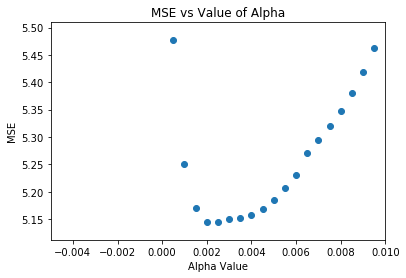

In [85]:
mses = np.array(mses)
print zip(alphas,mses)
plt.scatter(alphas, mses)
plt.xlim((-0.005,0.01))
plt.title("MSE vs Value of Alpha")
plt.xlabel("Alpha Value")
plt.ylabel("MSE")
plt.show()
# lasso2 = LassoLars(alpha=0.002, normalize=True, max_iter=10000).fit(X,y)



# ridge = model.fit_regularized(alpha=0.003, l1_wt=0)
# #result.summary()
# print cross_val2(X,y,lasso2)
# print cross_val2(X,y,ridge)
# print cross_val(X,y,ridgereg)


[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001]
[5.92419727, 5.79380879, 5.7758402, 5.79844853, 5.84121089, 5.88496218, 5.90851896, 5.98226149, 6.09553683]


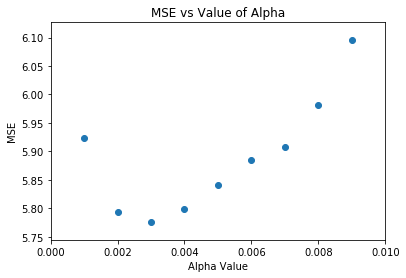

In [14]:
a= [(0.001,  5.92419727), (0.002, 5.79380879), (0.0030000000000000001, 5.7758402), (0.0040000000000000001,  5.79844853), (0.0050000000000000001, 5.84121089), (0.0060000000000000001,5.88496218), (0.0070000000000000001, 5.90851896), (0.0080000000000000002,  5.98226149), (0.0090000000000000011,  6.09553683)]
b = []
c = []
for i in a:
    b.append(i[0])
    c.append(i[1])
print b
print c
plt.scatter(b,c)
plt.xlim(0,0.01)
plt.title("MSE vs Value of Alpha")
plt.xlabel("Alpha Value")
plt.ylabel("MSE")
plt.show()


In [36]:
alphas=[0.0009, 0.00095, 0.0015, 0.0025]#np.arange(1, 10) * 0.001#[0.00001, 0.0001,0.001, 0.01, 0.1, 1]
#print alphas

mses2=[]
for a in alphas:
    err=cross_val2(X,y,a)
    mses2.append(err)
    print err
print mses2

There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.28877955]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.26909551]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.17100125]
There are 389 samples
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
[ 5.14440136]
[array([ 5.28877955]), array([ 5.26909551]), array([ 5.17100125]), array([ 5.14440136])]


In [ ]:
model = sm.OLS(y,X)#stats0models.regression.linear_models.ols(y,X)#sm.ols(y,X)
lasso2 = model.fit_regularized(alpha=0.003, l1_wt=1)

X_re = dummies.sample(10000,teplace=True)

model2 = sm.OLS(X_re, )